In [0]:
!pip install tensorflow-gpu==2.0.0 --upgrade

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
import pandas as pd
dataset_path = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
dataset = pd.read_csv(dataset_path)

x_train = dataset.sample(frac=0.7,random_state=0)
x_test = dataset.drop(x_train.index)

y_train = x_train.pop('Outcome')
y_test = x_test.pop('Outcome')

In [0]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199,76,43,0,42.9,1.394,22
122,2,107,74,30,100,33.6,0.404,23
113,4,76,62,0,0,34.0,0.391,25
14,5,166,72,19,175,25.8,0.587,51
529,0,111,65,0,0,24.6,0.660,31


In [0]:
y_train.value_counts()

0    347
1    191
Name: Outcome, dtype: int64

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train[x_train.columns] = sc.fit_transform(x_train)
x_test[x_train.columns] = sc.transform(x_test)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

In [0]:
model = Sequential()
model.add(Dense(256,activation='relu', input_shape=[8])) # first hidden layer
model.add(Dense(128,activation='relu', kernel_regularizer=l2(l=0.001)))
model.add(Dense(64,activation='relu', kernel_regularizer=l2(l=0.001)))
model.add(Dense(1,activation='sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
from tensorflow.keras.callbacks import EarlyStopping
earlystopping = EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 0)
history = model.fit(x_train, y_train, 
                    epochs = 100, 
                    validation_split=0.3,
                    # verbose = 0,
                    callbacks = [earlystopping])

Train on 376 samples, validate on 162 samples
Epoch 1/100
376/376 [==============================] - 0s 552us/sample - loss: 0.8986 - accuracy: 0.6410 - val_loss: 0.8798 - val_accuracy: 0.6111
Epoch 2/100
376/376 [==============================] - 0s 114us/sample - loss: 0.8332 - accuracy: 0.6596 - val_loss: 0.8224 - val_accuracy: 0.6111
Epoch 3/100
376/376 [==============================] - 0s 134us/sample - loss: 0.7762 - accuracy: 0.6915 - val_loss: 0.7716 - val_accuracy: 0.6111
Epoch 4/100
376/376 [==============================] - 0s 121us/sample - loss: 0.7312 - accuracy: 0.6862 - val_loss: 0.7257 - val_accuracy: 0.6790
Epoch 5/100
376/376 [==============================] - 0s 128us/sample - loss: 0.6952 - accuracy: 0.7048 - val_loss: 0.7122 - val_accuracy: 0.6420
Epoch 6/100
376/376 [==============================] - 0s 108us/sample - loss: 0.6586 - accuracy: 0.7074 - val_loss: 0.6623 - val_accuracy: 0.7160
Epoch 7/100
376/376 [==============================] - 0s 149us/sample -

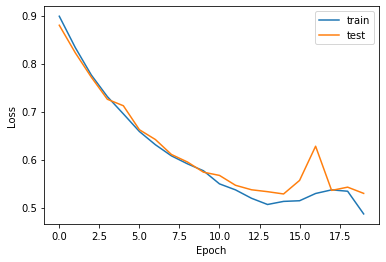

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(len(loss))

plt.plot(epoch, loss, label='train')
plt.plot(epoch, val_loss, label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

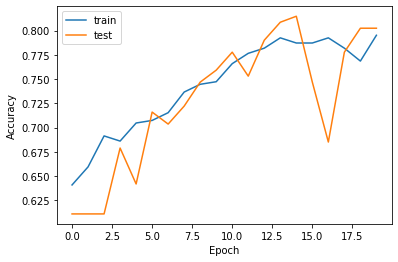

In [0]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(acc))

plt.plot(epoch,acc,label='train')
plt.plot(epoch,val_acc,label='test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
model.evaluate(x_test, y_test)

230/230 [==============================] - 0s 86us/sample - loss: 0.5885 - accuracy: 0.7304


[0.588492753194726, 0.7304348]

In [0]:
probs = model.predict(x_test)

In [0]:
probs[:10]

array([[0.07697088],
       [0.8069899 ],
       [0.21692306],
       [0.20135164],
       [0.65817785],
       [0.48903957],
       [0.33664984],
       [0.05320099],
       [0.05386159],
       [0.63029313]], dtype=float32)

In [0]:
# threshold of 0.5
preds = probs.flatten().round()

In [0]:
preds.astype(int)

array([0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds)

0.7304347826086957

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds)

array([[137,  16],
       [ 46,  31]])

### Set mean as threshold

In [0]:
threshold = y_train.mean()
threshold

0.3550185873605948

In [0]:
prob = 0.2
pred = 0 if prob < threshold else 1
pred

0

In [0]:
preds = [0 if prob < threshold else 1 for prob in probs]

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds)

0.7347826086956522

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds)

array([[125,  28],
       [ 33,  44]])